# **Implementación de aprendizaje máquina sin frameworks**

## **Instrucciones**

**Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

Entregable: Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

1.  Crea un repositorio de GitHub para este proyecto.
2.  Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.
3.  Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
4.  Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

## **Inicio de la solución**

Aquí iniciamos la información que vamos a usar en el problema, nos conectamos con google drive y nos movemos a la capeta donde se encuentra el dataset

In [54]:
#Cargamos los archivos
from google.colab import drive  # importa libreria
drive.mount("/content/gdrive")  # utiliza comando

!pwd

#put your own path in google drive
%cd '/content/gdrive/MyDrive/Tec/ColabAI/wine/'
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Tec/ColabAI/wine
/content/gdrive/MyDrive/Tec/ColabAI/wine
wine.data  wine.names


Importamos las librerias que vamos a utilizar. Depués leemos el archivo y para comprobar que todo está correto, imprimimos los primeros datos.

In [55]:
import pandas as pd # importar libreria

columns = ["Alcohol","Malic acid","Ash","Alcalinity of Ash", "Magnesium","Total phenols", "Flavanoids","Nonflavanoid phenols", "Proanthocyanins","Color intensity", "HUE","OD280/OD315 of diluted wines", "Proline"] # definir nombres de columna manualmente
df = pd.read_csv('wine.data', names = columns) # abrir el archivo de datos con los nombres dados para las columnas
df.head() # mostrar las primeras líneas del dataset que se cargó

,Alcohol,Malic acid,Ash,Alcalinity of Ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,HUE,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## **Definición del problema**

Como estamos usando un dataset nuevo, tenemos que ver que variables podemos comparar para realizar una predicción. Es por esto que a continuación se hace una matriz de correlación.

In [56]:
# Select only the specified columns from the DataFrame
selected_columns = df[columns]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                               Alcohol  Malic acid       Ash  \
Alcohol                       1.000000    0.094397  0.211545   
Malic acid                    0.094397    1.000000  0.164045   
Ash                           0.211545    0.164045  1.000000   
Alcalinity of Ash            -0.310235    0.288500  0.443367   
Magnesium                     0.270798   -0.054575  0.286587   
Total phenols                 0.289101   -0.335167  0.128980   
Flavanoids                    0.236815   -0.411007  0.115077   
Nonflavanoid phenols         -0.155929    0.292977  0.186230   
Proanthocyanins               0.136698   -0.220746  0.009652   
Color intensity               0.546364    0.248985  0.258887   
HUE                          -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines  0.072343   -0.368710  0.003911   
Proline                       0.643720   -0.192011  0.223626   

                              Alcalinity of Ash  Magnesium  Total phenols  \
Alcohol                   

Podemos ver que, las variables de Total phenols y Flavanoids tienen una alta correlación, con un valor de 0.86 en la matriz. Es por esto que se seleccionan estas variables para hacer el modelo. Para visualizar su correlación podemos ver el siguiente gráfico.

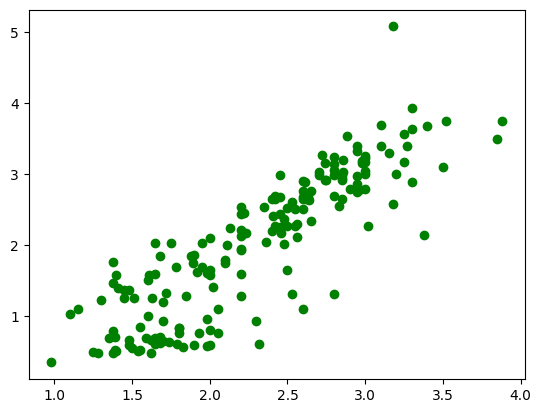

In [57]:
from matplotlib import pyplot as plt
plt.scatter(df['Total phenols'],df['Flavanoids'],color='g')

## **Implementación de la regresión lineal**

Podemos ver que el comportamiento que tienen estas variables puede ser determinado por una regresión lineal. A partir de aquí iniciamos con su implementación.

Definimos las variables que vamos a utilizar y les damos un eje (x y y). Además, inicializamos los valores del modelo para theta (coeficientes de la función de predicción) y alpha (taza de aprendizaje)

In [58]:
x = df['Total phenols']
y = df['Flavanoids']

# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1,1]

# Cargar el valor del learning rate (alpha)
alpha = 0.1

Una vez definidas las variables iniciales, creamos nuestro modelo representado por h, el cual tiene la forma de una función lineal.

In [59]:
# Crear función lambda para la función de hipótesis
h = lambda x,theta: theta[0] + theta[1] * x

# Calcular el total de muestras a partir de los datos (n)
n = len(x)

Se inicia el proceso de calcular los valores necesarios para que theta se ajuste al modelo. No se usan tantas repeticiones ya que con estas es suficiente para llegar a un resultado estable.

In [60]:
its = 10000 #Variable para definir el numero de iteraciones

for i in range(its):
  # Calcular delta para theta0 y para cada muestra
  # Calcular delta para theta1 y para cada muestra
  # Calcular sumatorias y promedio
  delta = []
  deltax = []
  for xi,yi in zip(x,y):
    pred = h(xi,theta)
    delta.append(pred-yi)
    deltax.append((pred-yi)*xi)

  dJt0 = 1/n*sum(delta)
  dJt1 = 1/n*sum(deltax)

  theta[0] = theta[0] - alpha*dJt0
  theta[1] = theta[1] - alpha*dJt1

print(theta)

[-1.1376271584040418, 1.3798439140232532]


Podemos ver que los valores finales de theta cambiaron, pero para comprobar que sean acertados, podemos gráficar los datos y la función de predicción

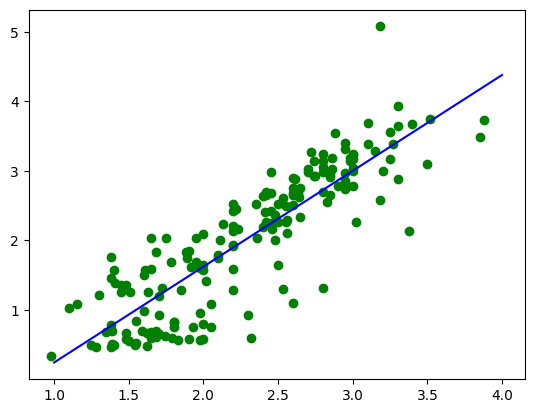

In [61]:
x_range = range(round(min(x)), round(max(x)) + 1)
hypothesis_line = [h(x_val, theta) for x_val in x_range]
plt.plot(x_range, hypothesis_line, color='blue', label='Hypothesis Line')
plt.scatter(x, y,color='g')
plt.show()

En la gráfica se puede observar que la línea se ajusta correctamente al comportamiento de los datos.

## **Pruebas**

Finalmente, podemos probar el modelo usando diferentes valores de Total Flavanoids, y los resultados que obtenemos tienen lógica en comparación de los datos obtenidos del dataset

In [62]:
h(2.5, theta)

2.311982626654091

In [63]:
h(1.5, theta)

0.9321387126308383

In [64]:
h(4, theta)

4.381748497688971